# Ridge and Lasso Regression

### Table of Contents
1. [Getting started](#1.-Getting-started)
2. [Estimating coefficients](#2.-Estimating-coefficients)
3. [Model evaluation](#3.-Model-evaluation)
4. [Exercise: model comparison and cross-validation](#4.-Exercise:-model-comparison-and-cross-validation)
5. [Exercise: regression with a new dataset](#5.-Exercise:-regression-with-a-new-dataset)

### 1. Getting started

In [64]:
# importing packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [65]:
# importing the data

adv = pd.read_csv('../data/advertising.csv') 
adv.head(5) # top 5 rows

,TV,Radio,Newspaper,Sales,Region
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


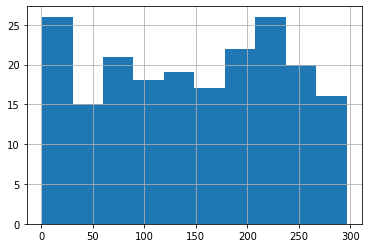

In [66]:
adv['TV'].hist()

This go around, we are going to __scale__ our features. Thinking back to our feature engineering lesson, a common way to prepare data for regression is __standardization__, also known as __z-score normalization__.

The idea is that for every column `x`, the transformed values for that column `x'`are calculated as follows so that the resulting values are normally distributed:

$x' = \frac{x - x_{mean}}{\sigma}$

In [67]:
scaler = StandardScaler()
columns_to_scale = ['TV', 'Radio', 'Newspaper']
scaled_column_names = [column + '_scaled' for column in columns_to_scale]
scaled_columns = pd.DataFrame(scaler.fit_transform(adv[columns_to_scale]),
                              columns = scaled_column_names)
adv = pd.concat([adv, scaled_columns], axis = 1)

In [68]:
adv.head()

,TV,Radio,Newspaper,Sales,Region,TV_scaled,Radio_scaled,Newspaper_scaled
0,230.1,37.8,69.2,22.1,1,0.969852,0.981522,1.778945
1,44.5,39.3,45.1,10.4,1,-1.197376,1.082808,0.669579
2,17.2,45.9,69.3,9.3,1,-1.516155,1.528463,1.783549
3,151.5,41.3,58.5,18.5,1,0.052050,1.217855,1.286405
4,180.8,10.8,58.4,12.9,1,0.394182,-0.841614,1.281802


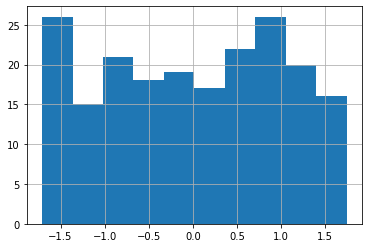

In [69]:
adv['TV_scaled'].hist()

In [70]:
# Split data into train and test

train, test = train_test_split(adv,
                               test_size=0.3,
                               random_state=1)

In [71]:
# Convert them back into dataframes, for convenience

train = pd.DataFrame(data=train,
                     columns=adv.columns)

test = pd.DataFrame(data=test,
                    columns=adv.columns)

### 2. Estimating coefficients

In [72]:
# Fit a linear regression model using OLS

slm = LinearRegression()
slm.fit(train[['TV_scaled','Newspaper_scaled']],
        train['Sales']) # obtaining fit only based on TV and Newspaper

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# Evaluate the output

print(slm.intercept_)
print(slm.coef_)

14.02325566772851
[4.04703724 1.14602834]


In [74]:
# Fit a linear regression model using Ridge

ridge = Ridge()
ridge.fit(train[['TV_scaled','Newspaper_scaled']],
          train['Sales']) # obtaining fit only based on Tv and Newspaper.

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
# Evaluate the output

print(ridge.intercept_)
print(ridge.coef_)

14.021704256924927
[4.01937016 1.13958793]


In [76]:
# Fit a linear regression model using Lasso

lasso = Lasso()
lasso.fit(train[['TV_scaled','Newspaper_scaled']],
          train['Sales']) # obtaining fit only based on Tv and Newspaper.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
# Evaluate the output

print(lasso.intercept_)
print(lasso.coef_)

13.953998686925575
[3.13084011 0.18733658]


### 3. Model Evaluation

Now, we evaluate the models we've created using the __test__ dataset (the data the model hasn't yet seen).

1. Evaluate the predictions of the two models based on the testing dataset

In [78]:
# Ridge
ridge_preds = ridge.predict(test[['TV_scaled','Newspaper_scaled']])
#  predicting the sales of test dataset based on TV and Newspaper

np.sqrt(mean_squared_error(test['Sales'], ridge_preds))
# RMSE obtained by Ridge

3.254178291230509

In [79]:
# Lasso
lasso_preds = lasso.predict(test[['TV_scaled','Newspaper_scaled']])
np.sqrt(mean_squared_error(test['Sales'], lasso_preds))

3.315521324183043

2. Evaluate the model using cross-validation

In [80]:
ridge_cv_scores = cross_val_score(ridge,
                                  adv[['TV_scaled', 'Newspaper_scaled']], adv['Sales'],
                                  cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-ridge_cv_scores))

3.12852078538332

In [81]:
lasso_cv_scores = cross_val_score(lasso,
                                  adv[['TV_scaled', 'Newspaper_scaled']], adv['Sales'],
                                  cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-lasso_cv_scores))

3.4168437877521995

### 4. Exercise: Model comparison and cross-validation

__(10 min.)__

1. Run all three types of multiple linear regressions (OLS, Ridge, Lasso) with __all__ of your features. 
  - Now that you've scaled your features, you don't need to use both the unscaled and scaled version
  - Which coefficients have higher values?
  - What does this suggest practically?


2. Calculate the 5-fold CV RMSE. Is it better or worse than before?

In [82]:
adv.columns.values

array(['TV', 'Radio', 'Newspaper', 'Sales', 'Region', 'TV_scaled',
       'Radio_scaled', 'Newspaper_scaled'], dtype=object)

In [83]:
# creating this list since we'll reuse it quite a bit
all_feature_columns = ['TV_scaled', 'Radio_scaled', 'Newspaper_scaled', 'Region']

In [84]:
### OLS

slm2 = LinearRegression()
slm2.fit(adv[all_feature_columns], adv['Sales'])
print(slm2.intercept_)
print(slm2.coef_)

14.13912826974458
[ 3.92084058  2.7888185  -0.02785333 -0.04609813]


In [85]:
slm_preds = slm2.predict(test[all_feature_columns])
np.sqrt(mean_squared_error(test['Sales'], slm_preds))

1.3088452281125191

In [86]:
slm_cv_scores = cross_val_score(slm2, adv[all_feature_columns], adv['Sales'], cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-slm_cv_scores))

1.7349202650773878

In [87]:
### Ridge

ridge2 = Ridge()
ridge2.fit(adv[all_feature_columns], adv['Sales'])
print(ridge2.intercept_)
print(ridge2.coef_)

14.139257198941007
[ 3.90179241  2.77367204 -0.02131136 -0.04614909]


In [88]:
ridge_preds = ridge2.predict(test[all_feature_columns])
np.sqrt(mean_squared_error(test['Sales'], ridge_preds))

1.309771343146713

In [89]:
ridge_cv_scores = cross_val_score(ridge2, adv[all_feature_columns], adv['Sales'], cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-ridge_cv_scores))

1.7342565065865085

In [90]:
### Lasso

lasso2 = Lasso()
lasso2.fit(adv[all_feature_columns], adv['Sales'])
print(lasso2.intercept_)
print(lasso2.coef_)

14.0225
[ 2.97037256  1.83608864  0.         -0.        ]


In [91]:
lasso_preds = lasso2.predict(test[all_feature_columns])
np.sqrt(mean_squared_error(test['Sales'], lasso_preds))

1.940752008491477

In [92]:
lasso_cv_scores = cross_val_score(lasso2, adv[all_feature_columns], adv['Sales'], cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-lasso_cv_scores))

2.19849333977948

### 5. Exercise: Regression with a new dataset

__(20 min.)__

1. Perform EDA on a new dataset: `credit.csv`

In [93]:
credit = pd.read_csv('../data/credit.csv')

In [94]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [95]:
# describe numerical columns
credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']].describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [96]:
credit['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [97]:
credit['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [98]:
credit['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [99]:
credit['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

2. Determine your target variable and features

In [100]:
# since 'Student' and 'Married' are binary, going to encode them as 0/1 so we can use them for our regression model
mapping_dict = {'Yes': 1, 'No': 0}
credit['Married'] = credit['Married'].map(mapping_dict)
credit['Student'] = credit['Student'].map(mapping_dict)
credit[['Married', 'Student']].describe()

,Married,Student
count,400.00000,400.000000
mean,0.61250,0.100000
std,0.48779,0.300376
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,0.000000
75%,1.00000,0.000000
max,1.00000,1.000000


In [101]:
target_variable = 'Rating'
feature_columns = ['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance', 'Student', 'Married']

In [102]:
credit_scaler = StandardScaler()
feature_columns_scaled = [column + '_scaled' for column in feature_columns]
scaled_features = pd.DataFrame(credit_scaler.fit_transform(credit[feature_columns]),
                               columns=feature_columns_scaled)
credit = pd.concat([credit, scaled_features], axis = 1)

In [103]:
credit_train, credit_test = train_test_split(credit, test_size=0.3, random_state=1)

In [104]:
credit_train = pd.DataFrame(data=credit_train, columns=credit.columns)
credit_test = pd.DataFrame(data=credit_test, columns=credit.columns)

3. Select a model: Ridge, Lasso, OLS

In [105]:
# going to use just Ridge here, but you could compare all 3
# more interested in which variables are most predictive

ridge_credit = Ridge()
ridge_credit.fit(credit_train[feature_columns_scaled], credit_train[target_variable])
print(ridge_credit.intercept_)
print(ridge_credit.coef_)

354.81558349366253
[ 13.80173715 125.7500314    5.5559441    0.80085856  -0.62895682
  20.32934952  -5.25907426   1.10213323]


In [106]:
dict(zip(feature_columns_scaled, ridge_credit.coef_))

{'Income_scaled': 13.801737145756308,
 'Limit_scaled': 125.75003140269243,
 'Cards_scaled': 5.555944095271236,
 'Age_scaled': 0.8008585644661985,
 'Education_scaled': -0.6289568206590518,
 'Balance_scaled': 20.329349517531064,
 'Student_scaled': -5.259074255713041,
 'Married_scaled': 1.1021332262607317}

In [107]:
ridge_credit_preds = ridge_credit.predict(credit_test[feature_columns_scaled])
np.sqrt(mean_squared_error(credit_test[target_variable], ridge_credit_preds))

11.655912084819018

4. Support your selections to your client

_The features `Limit`, `Balance`, and `Income` had the biggest effect on `Rating`, based on the magnitude of the coefficients of the scaled features._

### 6. Reference

- [Ridge and lasso regression](http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf)
- [scikit-learn](http://scikit-learn.org/stable/) 
- [scatter plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [mean squared error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html)